# Regression

In this learning unit, we will discuss the task of regression, one of the pilar of machine learning.

## Definition

Regression is the task of learning a mapping between input data and a continuous target variable. Formally, a regression problem can be defined as learning a function $f$ that will map input variables $X = x_0, x_1,\dots, x_{m-1}, x_{m}$ to a continuous target variable $y$ such that $f(x) = y$.

So for instance, let's say that we have the following data:

| Variable 1 | Variable 1 | Variable 3 | Variable 4 | Target variable |
|------------|------------|------------|------------|:---------------:|
| 1          | 2          | 3          | 4          | 10              |
| 2          | 3          | 4          | 5          | 14              |
| 3          | 4          | 5          | 6          | 18              |
| ...        | ...        | ...        | ...        | ...             |
| 2000       | 2001       | 2002       | 2003       | 8006            |

We would want to learn some function such that $f(1,2,3,4) = 10$ and $f(2,3,4,5) = 14$ and so on.

Regression is often compared to curve fitting, since it is trying to fit some function $f$ that will follow a similar curve as the data. For instance:

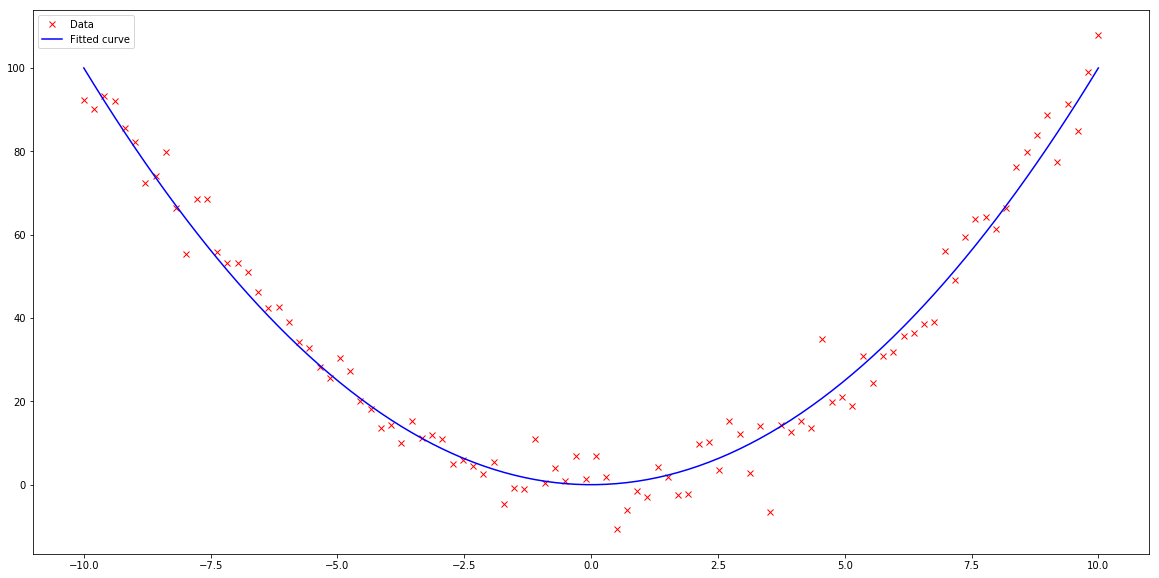

In [3]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: x**2
x = np.linspace(-10, 10, 100)

y = f(x) + np.random.normal(0,5, len(x)) # function of the curve with some normal noise added

plt.figure(figsize=(20,10))
data, = plt.plot(x, y, 'xr') ; fitted, = plt.plot(x, f(x), 'b')
plt.legend([data, fitted], ["Data", "Fitted curve"]) ; plt.show()

Of course, as the dimensions in the data increase, it becomes more difficult to visualize it.

## Practical examples

There are countless practical examples of regression. Below, we will mention a few.

The target of a regression problem can be a value that has a direct meaning, such as a price, an age, or some other types of measurement. It can also be the probability of an event!

+ **Predicting house prices**

_Input variables_: Number of bedrooms, whether it has a garage, living surface, age of the house

_Target variable_: Price of the house

_Example_:

| Bedrooms | Garage | Living surface | Age | Price ($) |
|:------------:|:------------:|:------------:|:------------:|:---------------:|
|3          | 0          | 3000          | 1         | 245000              |
| 2          | 1          | 2650          | 14          | 312040              |
| 4          | 0          | 4000          | 60          | 180000              |
| ...        | ...        | ...        | ...        | ...             |
| 5       | 1       | 5432       | 4       | 800670            |

This could be useful to make an estimate on a house, either if you're selling or buying one.

+ **Predicting student's grades**

_Input variables_: Grade on last test, GPA

_Target variable_: Grade on final exam

_Example_:

| Last test | GPA | Final Exam |
|:------------:|:------------:|:------------:|
|3          | 5.5          | 5          | 
| 10          | 7          | 6          |
| 7          | 8          | 7.5          | 
|...        | ...        | ...        |
| 8       | 9.2       | 10       |

A teacher could use this to identify which students might require additional attention.

+ **Predict how likely it is for a customer to default on a loan**

_Input variables_: Income, age, children, married

_Target variable_: Likelihood of defaulting

_Example_:

| Income | Age | Children | Married | Likelihood of defaulting |
|:------------:|:------------:|:------------:|:------------:|:---------------:|
|2500          | 33         | 1          | 1         | 0              |
| 1200         | 42          | 3          | 1         | 1              |
| 0          | 18          | 2          | 0          | 1              |
| ...        | ...        | ...        | ...        | ...             |
| 9000       | 28       | 0       | 0       | 0            |

## Evaluating regression

Machine learning is all about getting better and better at a task. Therefore, we need to define what it means to be _good_. For instance, given the output different models compared to the target variable, how would you define which model is better?

| Target | 0.55 | 0.72 | 0.6 | 0.54 | 0.42 | 0.65 | 0.44 | 0.89 | 0.96 | 0.38 |
|:-------:|:----------:|:----------:|:----------:|:-----:|:-:|:-:|:-:|:-:|
| Model A |  0.69 | 2.17 | 1.36 | 0.66 | 0.86 | 0.98 | 1.93 | 0.68 | 1.27 | -0.47 |
| Model B  | -1.36 | 1.21 | 1.25 | -0.02 | 2.12 | -0.44 | 0.47 | 0.75 | 2.11 | 1.48 |
| Model C |0.59 | 0.81 | 0.38 | 0.04 | 0.33 | 0.69 | 0.75 | 1.19 | 0.86 | 0.3 |
| Model D |0.03 | 0.01 | -0.25 | 1.52 | 0.17 | 0.43 | -0.19 | 1.28 | 0.15 | 0.27 |
| Model E | 0.1 | 0.91 | 0.34 | -0.05 | 0.41 | 0.86 | 0.47 | 1.04 | 0.64 | 0.2 |
Thankfully, there exists several commonly-used metrics to tackle this problem. Let's use the data from the table as example.

In [63]:
np.random.seed(0)

target = np.round(np.random.rand(10), 2) 
A = np.round(target + np.random.normal(0, 1, 10), 2)
B = np.round(target + np.random.normal(0, 0.75, 10), 2)
C = np.round(target + np.random.normal(0, 0.25, 10), 2)
D = np.round(target + np.random.normal(0, 0.5, 10), 2)
E = np.round(target + np.random.normal(0, 0.5, 10), 2)
models = {"A" : A, "B" : B, "C" : C, "D" : D, "E" : E}

### Mean-Squared Error

$ MSE = \frac{1}{n} \sum_{i = 0}^{n} (\hat{Y_i} - Y_i)^2$

The mean-squared error is probably the most commonly used metric for regression. It is often the default metric in many machine learning packages.

It is defined as the average of the square of the errors. It loosely means that large errors are proportionally _worse_ than small mistakes.

In Python, it looks like this.

In [64]:
def MSE(output, target):
    errors = output - target
    
    return np.mean(errors**2)

for model_name in ["A", "B", "C", "D", "E"]:
    print(model_name, ":", MSE(models[model_name], target))

A : 0.60994
B : 1.12554
C : 0.05203
D : 0.37855
E : 0.08567


### Root Mean-Squared Error

$ RMSE = \sqrt{\frac{1}{n} \sum_{i = 0}^{n} (\hat{Y_i} - Y_i)^2}$

The root mean-squared error is related to the mean squared error. It is simply the square root of the former metric. It has the advantage of being of the same units as the target variable. Therefore, it can be easily interpreted as the average distance of the output to the target.


In Python, it looks like this.

In [65]:
def RMSE(output, target):
    errors = output - target
    
    return np.sqrt(np.mean(errors**2))

for model_name in ["A", "B", "C", "D", "E"]:
    print(model_name, ":", RMSE(models[model_name], target))

A : 0.780986555582
B : 1.06091469968
C : 0.228100854887
D : 0.615264170905
E : 0.292694379857


### Mean Absolute Error

$ MAE = \frac{1}{n} \sum_{i = 0}^{n} |\hat{Y_i} - Y_i|$

As opposed to the mean-squared error, the mean absolute error views all errors as proportionally as bad and therefore, large errors are not penalized more.

In Python, it looks like this.

In [66]:
def MAE(output, target):
    errors = output - target
    
    return np.mean(np.abs(errors))

for model_name, model in models.items():
    print(model_name, ":", MAE(model, target))

A : 0.61
D : 0.547
C : 0.177
B : 0.882
E : 0.239


### R Squared

$ R^{2} = 1 - \frac{\sum_{i=0}^{n} (Y_i - \hat{Y_i})^2}{\sum_{i=0}^{n} (Y_i - \sum_{i=0}^n Y_i)^2}$

R squared is also often referred to as the coefficient of determination, or the explained variance. It represents how much of the target's variance be explained by the data.

_How to interpret it_: 1 is best, lower is worse


In Python, it looks like this.

In [67]:
def RSquared(output, target):
    numerator = np.sum((target - output)**2)
    denominator = np.sum((target - np.mean(target))**2)
    
    return 1 - (numerator / denominator)

for model_name, model in models.items():
    print(model_name, ":", RSquared(model, target))

A : -16.894675077
D : -10.1060583835
C : -0.52647792284
B : -32.0215637377
E : -1.51342232654


### Custom metrics

Of course, it is completely possibe to use custom metrics.

A simple example would be to use weighted versions of the aforementioned metrics. By doing this, you would loosely make it more important to perform well for certain data points. You could for instance use weights representing how likely a data point is to be noise, which you might know from another process. This would hold models to a lower standard around noisy data points, and to higher standards around good data points.

It could also be possible to have a fully custom metric based on a custom error function. Perhaps, your application entails that it is much worse to overshoot rather than undershoot for instance.

Ultimately, the metric should represent what it means for your regression to be good, whatever that means in your application.

## Common challenges

### Over- or underfitting, the bias-variance dilemna

A 


### Quality of the data

High quality data is data that accurately represents the real-world construct to which it refers. This usually translates to having well-sampled clean data.

By clean data, we mean data that is not overwhelmingly plagued by noise. We will go more in details about how to handle noise in the preprocessing learning unit.

>If we are trying to predict how many likes a Facebook comment written by a human is going to get, we should probably not have a dataset where many of the comments and likes were coming from spambots.

By well-sampled, we refer to the fact that the data must be representative of the real-world problem at which we are trying to perform well. While it is statistically true that a larger a dataset will be more likely to be representative, it is far from being a guarantee. A large dataset could be skewed towards certain parts of the distribution or could simply be too noisy. We therefore do not need a lot of data, we need enough good data.

>If we are trying to predict a normal person's salary based on their age, our training data should probably not be mostly composed of billionaires. No matter how much data we have about these billionaires, this will probably not help us much with our task. 



### Misinterpreting results

_Side note_

Correlation doesn’t mean causation.

<INSERT: famous examples of strange correlation>

In ML, we are focused on performing a task well. Which means that in regression, we are more interested in predicting the correct output, than we are in understanding how the input affects the output. All we care is that if we know X, we can predict Y accurately.

Perhaps, in some cases, knowing some variables are more important than knowing others at performing our task, and this is perfectly fine. It’s important to make a distinction between “these variables are important to help me make a good prediction” and “these variables are causing this to happen”.

Some models that will be covered later on will be said to be white-box and others will be said to be black-box. Indeed, some models offer clearer insights on how they interpret the variables, but this still doesn’t mean that they somehow offer more clarity on the causal effect of variables. Proving causality would require more than machine learning.


Perhaps X doesn’t affect Y but is a “victim” of a third variable Z → Example of Freakonomics with books and smart kids (correlation but perhaps no causation) → such variables are called latent variables and are an area of focus in machine learning)
